In [ ]:
!sudo apt install tesseract-ocr
try : from PIL import Image
except ImportError : import Image
import cv2
import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


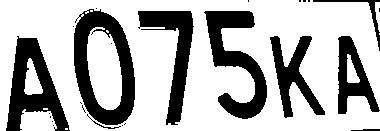

Номер автомобиля:  AQ7SKA



In [ ]:
import cv2
import numpy as np
import pytesseract

# Загрузка изображения
img = cv2.imread('1.jpg')

# Загрузка модели YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Список классов
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Задание параметров нейросети
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Применение YOLO для детектирования номерного знака
'''blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)'''

# Получение координат номерного знака
class_ids = []
confidences = []
boxes = []
'''for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and class_id == 2: #Выбор класса "car"
            center_x = int(detection[0] * img.shape[1])
            center_y = int(detection[1] * img.shape[0])
            w = int(detection[2] * img.shape[1])
            h = int(detection[3] * img.shape[0])
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])'''
#cv2_imshow(img)
# Вырезание номерного знака из изображения
#x, y, w, h = boxes[0]
#crop_img = img[int(y):int(y+h), int(x):int(x+w)]
#cv2_imshow(crop_img)
# Распознавание символов
img=cv2.imread('1.jpg', cv2.IMREAD_COLOR)
img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=cv2.bilateralFilter(gray,11,17,17)
#gray = cv2.medianBlur(gray, 5)
#gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#cv2_imshow(gray)

img = cv2.resize(img,(600,400))
crop = img[130:261, 70:450]
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)
result = 255 - close
#cv2_imshow(crop)
#cv2_imshow(sharpen)
#cv2_imshow(thresh)
#cv2_imshow(close)
cv2_imshow(result)
cv2.waitKey()

text = pytesseract.image_to_string(gray, config='--oem 3 --psm 13', lang ='eng')
print("Номер автомобиля: ", text)

In [ ]:
!wget https://avtoshark.com/wp-content/uploads/2020/12/krutoj-nomernoj-znak.jpg

--2023-05-22 21:23:35--  https://avtoshark.com/wp-content/uploads/2020/12/krutoj-nomernoj-znak.jpg
Resolving avtoshark.com (avtoshark.com)... 172.67.140.74, 104.21.27.9, 2606:4700:3037::ac43:8c4a, ...
Connecting to avtoshark.com (avtoshark.com)|172.67.140.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146747 (143K) [image/jpeg]
Saving to: ‘krutoj-nomernoj-znak.jpg’

krutoj-nomernoj-zna 100%[===================>] 143.31K  --.-KB/s    in 0.1s    

2023-05-22 21:23:36 (1.21 MB/s) - ‘krutoj-nomernoj-znak.jpg’ saved [146747/146747]



In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!wget http://klubmama.ru/uploads/posts/2022-08/1661464221_2-klubmama-ru-p-nomer-mashini-raspechatat-dlya-podelki-fot-2.jpg

--2024-04-05 17:29:17--  http://klubmama.ru/uploads/posts/2022-08/1661464221_2-klubmama-ru-p-nomer-mashini-raspechatat-dlya-podelki-fot-2.jpg
Resolving klubmama.ru (klubmama.ru)... 146.59.9.33
Connecting to klubmama.ru (klubmama.ru)|146.59.9.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116899 (114K) [image/jpeg]
Saving to: ‘1661464221_2-klubmama-ru-p-nomer-mashini-raspechatat-dlya-podelki-fot-2.jpg’

1661464221_2-klubma 100%[===================>] 114.16K   342KB/s    in 0.3s    

2024-04-05 17:29:18 (342 KB/s) - ‘1661464221_2-klubmama-ru-p-nomer-mashini-raspechatat-dlya-podelki-fot-2.jpg’ saved [116899/116899]



In [ ]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg

--2024-04-05 17:29:22--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2024-04-05 17:29:22 (22.3 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-04-05 17:29:23--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.7MB/s    in 11s     

2024-04-05 17:29:35 (20.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names

--2024-04-05 17:29:35--  https://github.com/pjreddie/darknet/blob/master/data/coco.names
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘coco.names’

coco.names              [ <=>                ] 148.77K  --.-KB/s    in 0.05s   

2024-04-05 17:29:35 (2.87 MB/s) - ‘coco.names’ saved [152344]

